In [1]:
%load_ext autoreload
%autoreload 2

from utils.preprocessing import create_time_matrix, create_caregivers_df, create_tasks_df, create_clients_df

caregivers = create_caregivers_df('data/raw/caregivers.csv')

tasks = create_tasks_df('data/raw/hemtjanst_tasks.csv', only_client_tasks=True)

clients = create_clients_df('data/raw/clients.csv')

drive_time_matrix = create_time_matrix('data/raw/duration_matrix_DRIVE.csv')
walk_time_matrix = create_time_matrix('data/raw/duration_matrix_WALK.csv')
bicycle_time_matrix = create_time_matrix('data/raw/duration_matrix_BICYCLE.csv')

In [ ]:
# Test1: Subset with only caregivers 33, 949, 1108 and their tasks
test1_subset = [33, 949, 1108]
test_caregivers = caregivers.loc[test1_subset]
test_tasks = tasks[tasks['PlannedCaregiverID'].isin(test1_subset)]
small_test = (test_caregivers, test_tasks)

# Test2: Subset with only first 10 caregivers that use car as mode of transport
car_caregivers = caregivers[caregivers['ModeOfTransport'] == 'car']
car_tasks = tasks[tasks['PlannedCaregiverID'].isin(car_caregivers.index)]
car_test = (car_caregivers, car_tasks)

full_test = (caregivers, tasks)

In [ ]:
from models.fixed_model import FixedModel
from models.partition_model import PartitionModel
from models.tsp_model import TSPModel
from models.hexaly_model import HexalyModel
model_type = HexalyModel
model_caregivers, model_tasks = small_test

model = model_type(model_caregivers, model_tasks, clients, drive_time_matrix, walk_time_matrix, bicycle_time_matrix)
model.build(
        # caregiver_penalty=0,
        # overtime_penalty=0,
        # worktime_per_break=0,
        # continuity_penalty=0,
)
# model.optimize(
# #     NoRelHeurWork=200, 
# #     Heuristics=0.2, 
# #     MIPFocus=1,
#     )

Push initial solution 100%
Model:  expressions = 101, decisions = 2, constraints = 1, objectives = 2
Param:  no time limit, no iteration limit

[objective directions]:     minimize |     minimize

[  0 sec,       0 itr]: No feasible solution found (infeas = 1)
[  1 sec,  133908 itr]:            0 |       271.25
[  2 sec,  572809 itr]:            0 |       271.25
[  3 sec, 1026191 itr]:            0 |       271.25
[  4 sec, 1507484 itr]:            0 |       271.25
[  5 sec, 1987290 itr]:            0 |       271.25
[  6 sec, 2511488 itr]:            0 |       271.25
[  7 sec, 2974170 itr]:            0 |       271.25
[  8 sec, 3466360 itr]:            0 |       271.25
[  9 sec, 3977909 itr]:            0 |       271.25
[ 10 sec, 4461904 itr]:            0 |       271.25
[ optimality gaps    ]:           0% |       > 100%
[ 11 sec, 4988351 itr]:            0 |       271.25
[ 12 sec, 5530635 itr]:            0 |       271.25
[ 13 sec, 6039449 itr]:            0 |       271.25
[ 14 sec, 6

Exception ignored on calling ctypes callback function <function HexalyOptimizer.__init__.<locals>.<lambda> at 0x1228f3240>:
Traceback (most recent call last):
  File "/Users/vilhelmkarlin/Code/KTH/SA120X_KEX/.venv/lib/python3.13/site-packages/hexaly/optimizer.py", line 3426, in <lambda>
    cb = (self, None, HxCallbackType.TIME_TICKED, _hx_callback_type(lambda _1, _2, _3: None))
  File "/Users/vilhelmkarlin/Code/KTH/SA120X_KEX/.venv/lib/python3.13/site-packages/hexaly/optimizer.py", line 379, in _hx_signal_handler
    _chained_signal_handler[sig](sig, frame)
KeyboardInterrupt: 


KeyboardInterrupt: 

In [9]:
model.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D70)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Non-default parameters:
Heuristics  0.2
MIPFocus  1
NoRelHeurWork  120

Optimize a model with 32722 rows, 3637440 columns and 21718662 nonzeros
Model fingerprint: 0x8a353f1f
Variable types: 64 continuous, 3637376 integer (3637376 binary)
Coefficient statistics:
  Matrix range     [3e-03, 9e+02]
  Objective range  [1e+00, 6e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+02]
Presolved: 20043 rows, 1443474 columns, 6916100 nonzeros

Continuing optimization...

H  197   208                    22595.908333 17452.6403  22.8% 32680 25610s
   197   208 17529.6167   22 2002 22595.9083 17452.6403  22.8% 32745 25610s
H  200   208                    22518.116667 17452.6403  22.5% 32298 25610s
H  207   217                    22477.708333 17452.6403  22.4% 31858 26799s
H  209   217           

<gurobi.Model MIP instance HomeCare: 32722 constrs, 3637440 vars, Parameter changes: Heuristics=0.2, MIPFocus=1, NoRelHeurWork=120.0, Username=(user-defined), LicenseID=2635249>

Model not optimally solved. Status: 11


/Users/vilhelmkarlin/Code/KTH/SA120X_KEX/utils/visualization.py:521: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dashboard_fig.show()


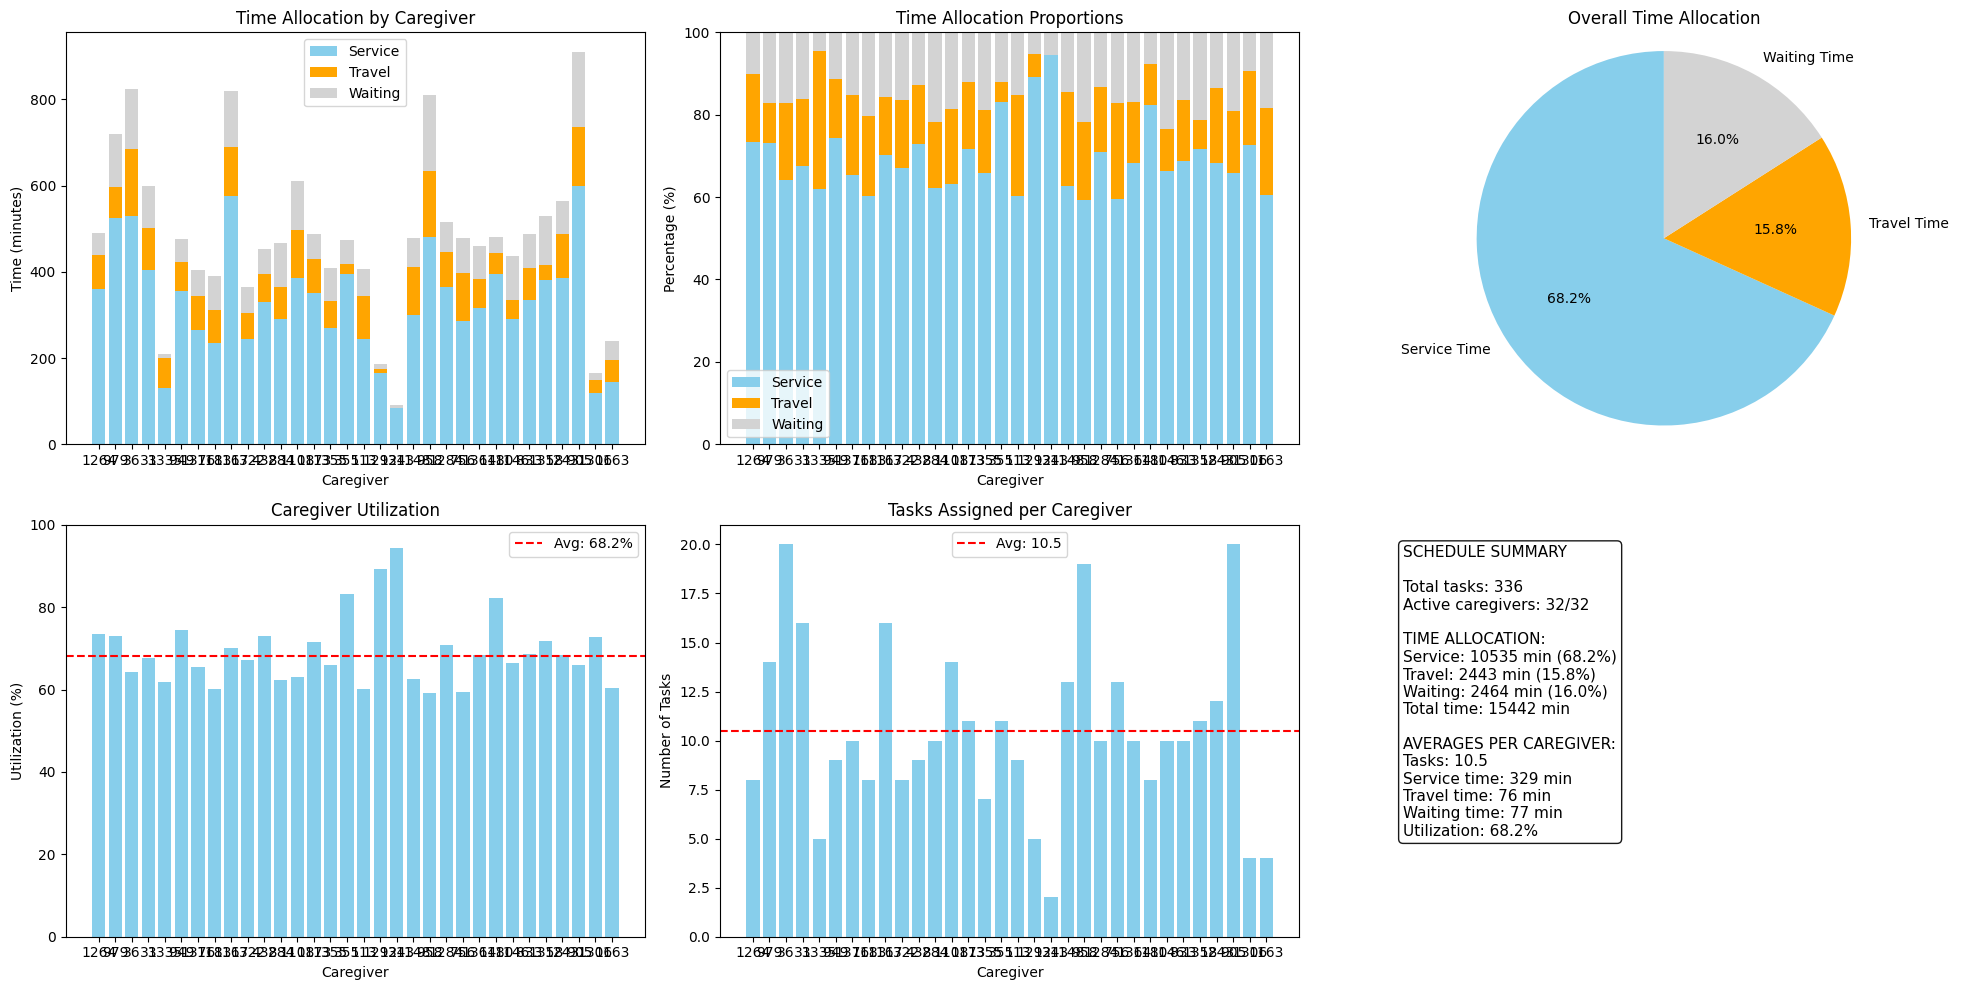

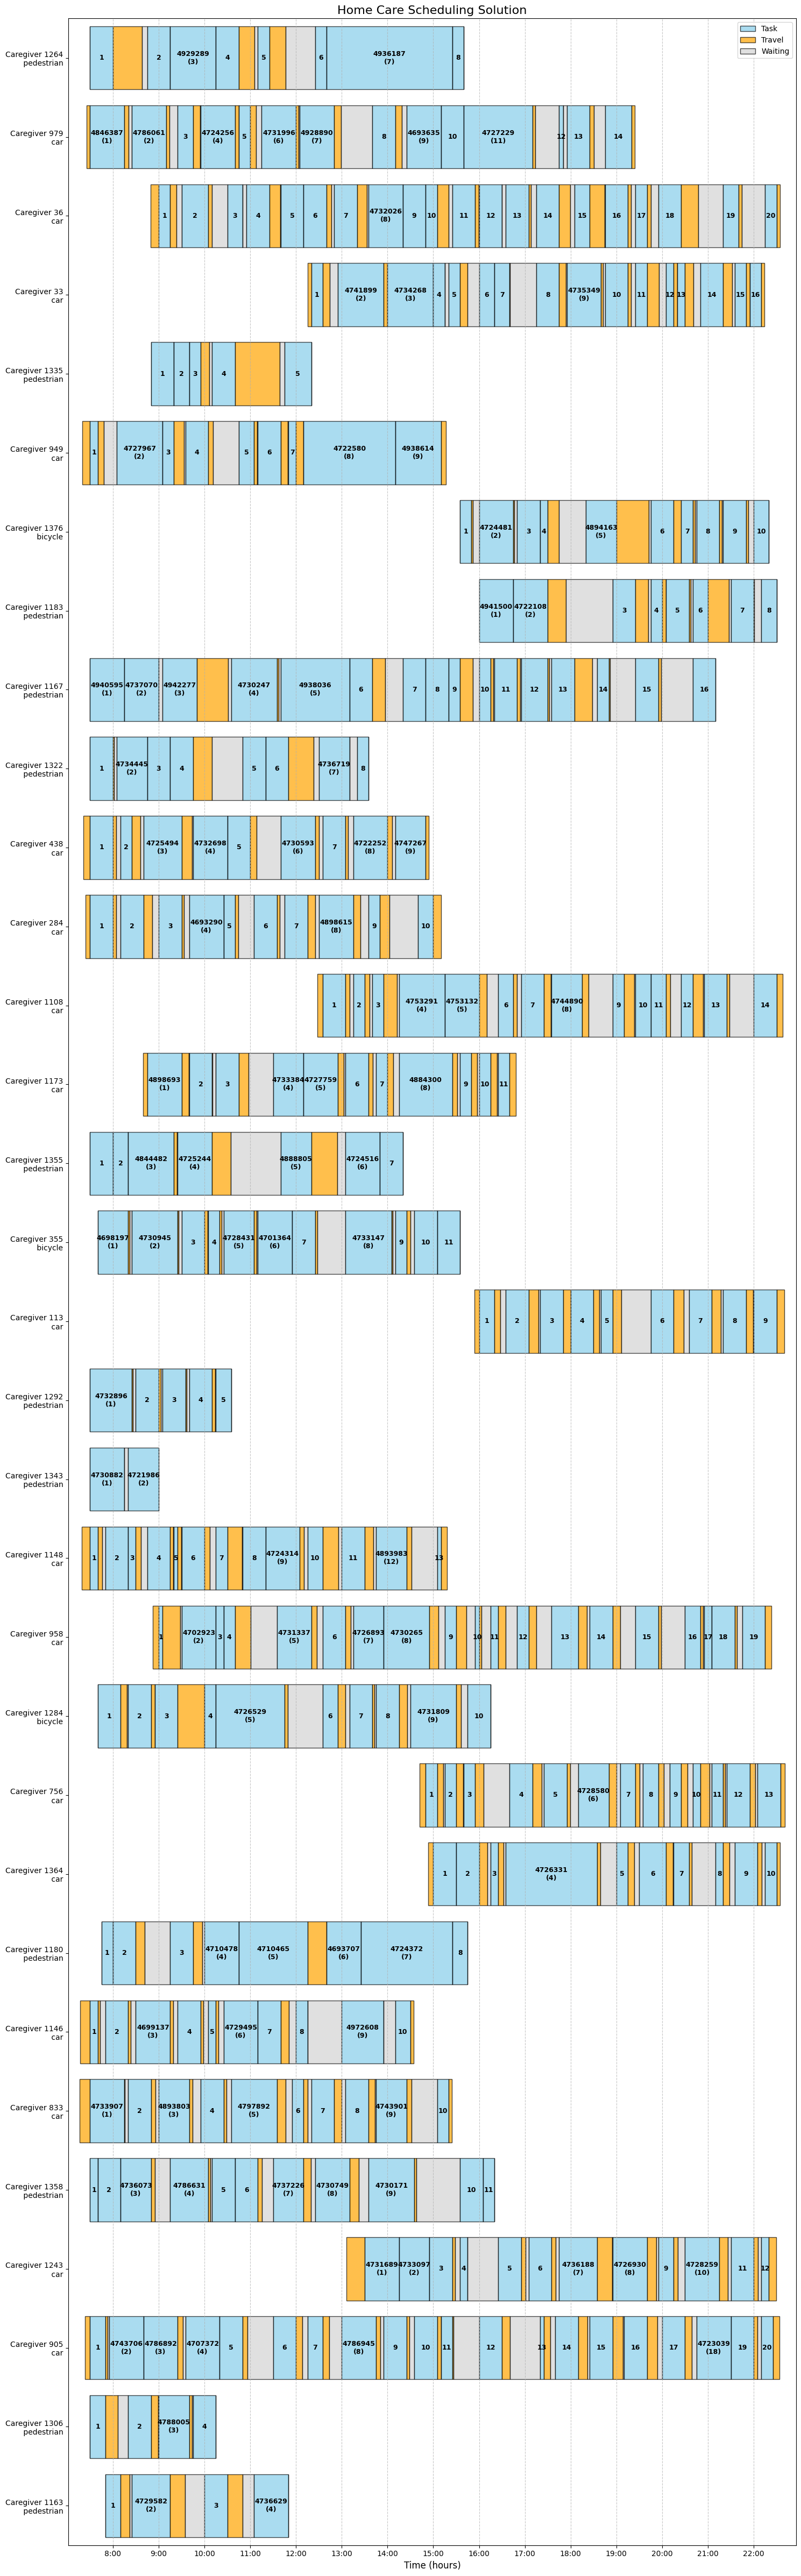

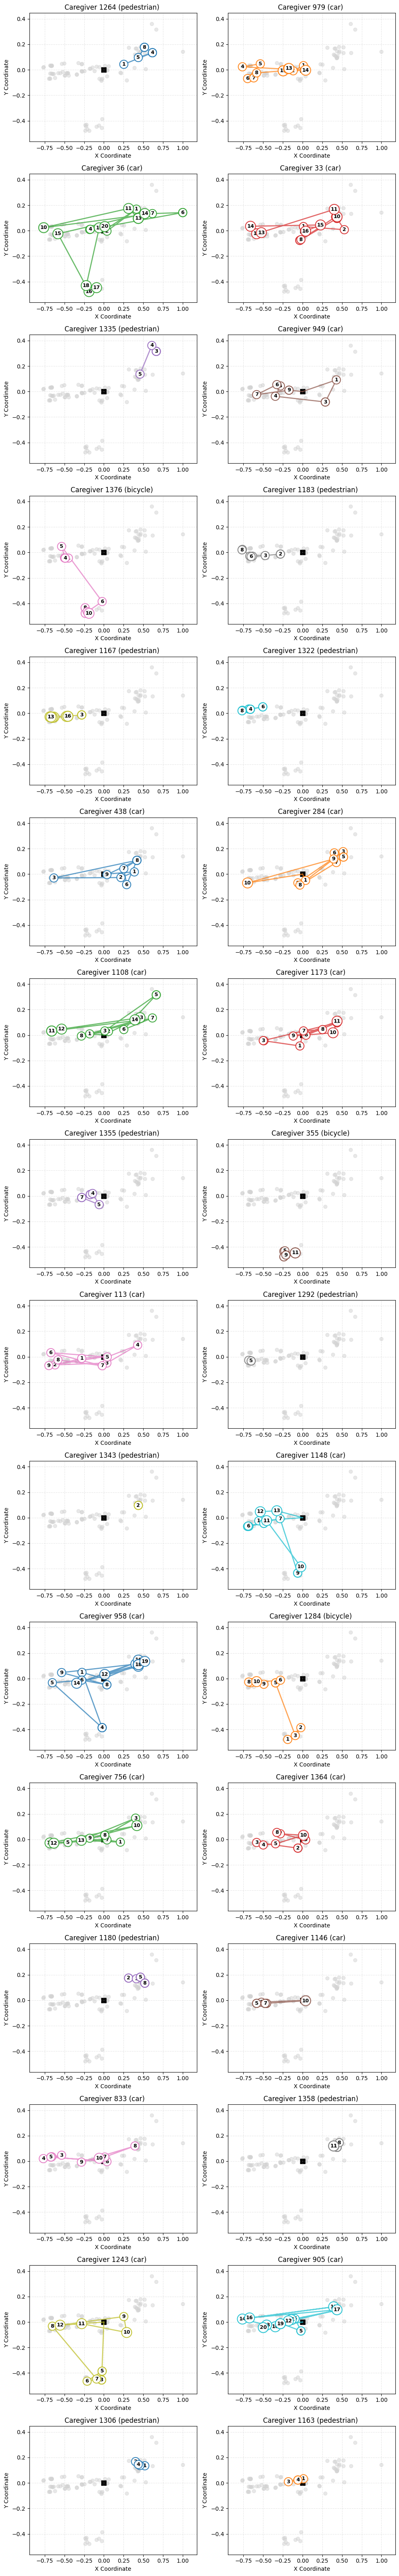

In [10]:
from utils.visualization import visualize_schedule, visualize_metrics, visualize_routes

model.get_solution()

visualize_metrics(model, display_mode='dashboard');
visualize_schedule(model);
visualize_routes(model, caregiver_ids=None, subplot_mode=True);

In [ ]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

import matplotlib.pyplot as plt
import gurobipy.logtools as logtools

# Get the log from the solved model
log = model.m._Model__log

# Check if Gurobi's logtools is available
try:
    
    # Parse the log
    parsed_log = logtools.parse_log(log)
    
    # Create a figure with multiple subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Gurobi Optimization Details', fontsize=16)
    
    # Plot bound progress
    logtools.plot_log_curve(parsed_log, 'Objective Bound Progress', ax=axs[0, 0])
    
    # Plot gap progress
    logtools.plot_gap_progress(parsed_log, ax=axs[0, 1])
    
    # Plot explored nodes
    logtools.plot_log_curve(parsed_log, 'Explored Node Count', ax=axs[1, 0])
    
    # Plot runtime distribution
    runtime_data = logtools.get_runtime_distribution(parsed_log)
    if runtime_data is not None:
        labels = list(runtime_data.keys())
        sizes = list(runtime_data.values())
        axs[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%')
        axs[1, 1].set_title('Runtime Distribution')
    else:
        axs[1, 1].text(0.5, 0.5, 'Runtime distribution data not available', 
                      horizontalalignment='center', verticalalignment='center')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
except ImportError:
    print("Gurobi logtools not available. Showing basic log statistics instead.")
    
    # Extract solver iterations from log
    iterations = []
    objectives = []
    bounds = []
    gaps = []
    
    for line in log.split('\n'):
        if "Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap" in line:
            header_line = True
            continue
            
        if header_line and '|' in line and '*' in line:
            parts = line.split('|')
            if len(parts) >= 3:
                # Try to extract objective value
                incumbent_str = parts[2].split()[0].replace('*', '').strip()
                if incumbent_str and incumbent_str != '-':
                    try:
                        incumbent = float(incumbent_str)
                        iterations.append(len(objectives))
                        objectives.append(incumbent)
                    except:
                        pass
                        
    # Plot improvement of objective value over iterations
    if objectives:
        plt.figure(figsize=(10, 6))
        plt.plot(iterations, objectives, 'b-', marker='o')
        plt.title('Objective Value Improvement')
        plt.xlabel('Iteration')
        plt.ylabel('Objective Value')
        plt.grid(True)
        plt.show()
    else:
        print("Could not extract solver progress from log")

In [35]:
from utils.solution_storage import save_solution
save_solution(model, 'full_test_first_draft')

Solution saved to data/saved_solutions/20250331_081731_full_test_first_draft.json


'data/saved_solutions/20250331_081731_full_test_first_draft.json'